<a href="https://colab.research.google.com/github/vnky21/PREDIKSI-PENGGUNAAN-BEBAN-LISTRIK-MENGGUNAKAN-METODEREGRESI-LINEAR-BERGANDA/blob/main/Fix_PREDIKSI_PENGGUNAAN_BEBAN_LISTRIK_MENGGUNAKAN_METODE_REGRESI_LINEAR_BERGANDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDIKSI PENGGUNAAN BEBAN LISTRIK MENGGUNAKAN METODE REGRESI LINEAR BERGANDA**


# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Import Dataset

In [ ]:
url = 'https://drive.google.com/file/d/1T7OSZcUdiN6bjMvHmlfLMDOWHv3tuPSG/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

# Analisis Data Eksploratif

In [ ]:
data[['JUMLAH PELANGGAN', 'DAYA TERSAMBUNG (kVA)', 'PENDAPATAN PENJUALAN ENERGI (Rp)', 'KWH TERJUAL (kWh)']].describe()

,JUMLAH PELANGGAN,DAYA TERSAMBUNG (kVA),PENDAPATAN PENJUALAN ENERGI (Rp),KWH TERJUAL (kWh)
count,8.000000,8.000000,8.000000,8.000000
mean,129.660125,381.338125,700.030875,591.333750
std,18.841357,60.238035,135.418653,95.111373
min,101.633000,290.413000,411.560000,391.967000
25%,116.813000,342.151750,676.286000,567.361750
50%,129.986500,383.660000,728.230500,613.636500
75%,143.150500,420.752250,753.797250,632.743750
max,156.155000,470.058000,870.021000,712.076000


In [ ]:
data

,TAHUN,JUMLAH PELANGGAN,DAYA TERSAMBUNG (kVA),PENDAPATAN PENJUALAN ENERGI (Rp),KWH TERJUAL (kWh)
0,2016,101.633,290.413,411.560,391.967
1,2017,110.756,320.644,638.312,542.548
2,2018,118.832,349.321,688.944,575.633
3,2019,126.262,373.522,740.120,617.655
4,2020,133.711,393.798,719.894,609.618
5,2021,141.335,415.030,736.567,624.901
6,2022,148.597,437.919,794.829,656.272
7,2023,156.155,470.058,870.021,712.076


In [ ]:
print('Tipe data setiap kolom :')
data.dtypes

Tipe data setiap kolom :


,0
TAHUN,int64
JUMLAH PELANGGAN,float64
DAYA TERSAMBUNG (kVA),float64
PENDAPATAN PENJUALAN ENERGI (Rp),float64
KWH TERJUAL (kWh),float64


# Visualisasi Tren Data dan Matriks Korelasi Data

<ipython-input-6-146a7f77a889>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


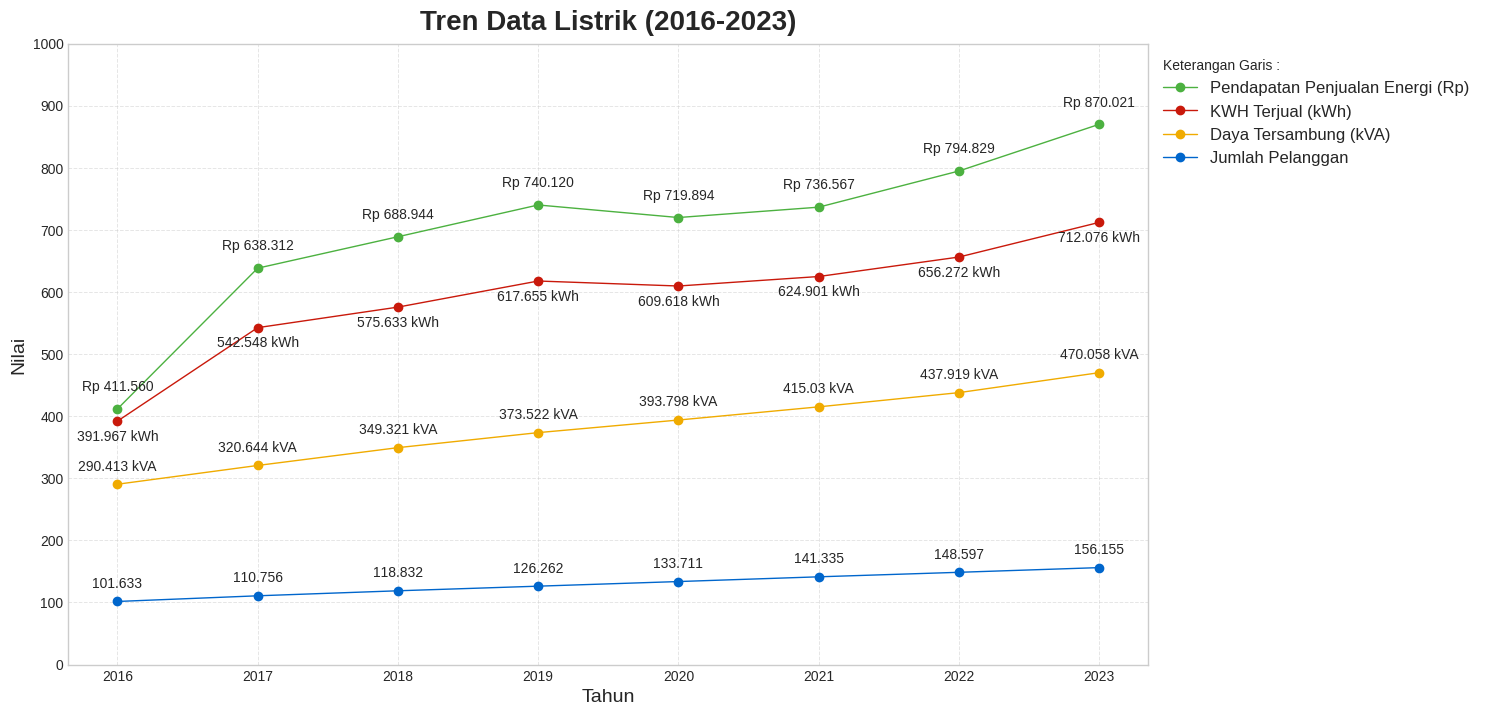

In [ ]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16, 9))
colors = ['#06C', '#F0AB00', '#4CB140', '#C9190B']

ax.plot(data['TAHUN'], data['PENDAPATAN PENJUALAN ENERGI (Rp)'], marker='o', label='Pendapatan Penjualan Energi (Rp)', color=colors[2], linewidth=1)
for i, nilai in enumerate(data['PENDAPATAN PENJUALAN ENERGI (Rp)']):
    ax.annotate('Rp {:,.3f}'.format(nilai), (data['TAHUN'][i], nilai), textcoords="offset points", xytext=(0,13), ha='center', fontsize=10)

ax.plot(data['TAHUN'], data['KWH TERJUAL (kWh)'], marker='o', label='KWH Terjual (kWh)', color=colors[3], linewidth=1)
for i, nilai in enumerate(data['KWH TERJUAL (kWh)']):
    ax.annotate(str(nilai) + ' kWh', (data['TAHUN'][i], nilai), textcoords="offset points", xytext=(0,-14), ha='center', fontsize=10)

ax.plot(data['TAHUN'], data['DAYA TERSAMBUNG (kVA)'], marker='o', label='Daya Tersambung (kVA)', color=colors[1], linewidth=1)
for i, nilai in enumerate(data['DAYA TERSAMBUNG (kVA)']):
    ax.annotate(str(nilai) + ' kVA', (data['TAHUN'][i], nilai), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

ax.plot(data['TAHUN'], data['JUMLAH PELANGGAN'], marker='o', label='Jumlah Pelanggan', color=colors[0], linewidth=1)
for i, nilai in enumerate(data['JUMLAH PELANGGAN']):
    ax.annotate(str(nilai), (data['TAHUN'][i], nilai), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

ax.set_title('Tren Data Listrik (2016-2023)', fontsize=20, fontweight='bold', pad=10)
ax.set_xlabel('Tahun', fontsize=14)
ax.set_ylabel('Nilai', fontsize=14)
plt.subplots_adjust(top=0.8)
ax.set_ylim(0, 1000)

ax.yaxis.set_major_locator(MultipleLocator(100))
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.5)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, title="Keterangan Garis :", fontsize=12, alignment='left')
plt.subplots_adjust(right=0.8)

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.show()

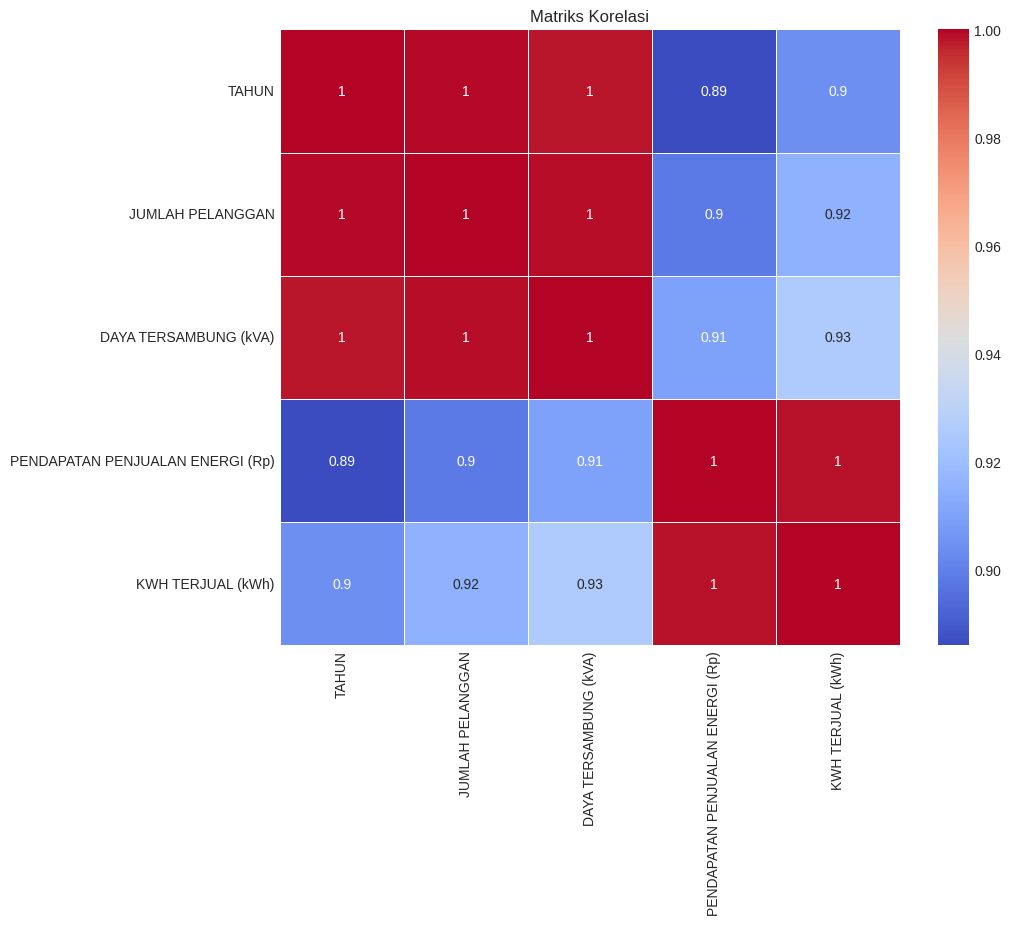

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

# Membangun Model Regresi Linear Berganda

In [ ]:
X = data.drop(['KWH TERJUAL (kWh)','TAHUN'], axis=1)
y = data['KWH TERJUAL (kWh)']

model = LinearRegression()
model.fit(X, y)

koefisien = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Koefisien:", koefisien)

print(f"\nPersamaan regresi: Y = {intercept:.4f} + ({koefisien[0]:.4f}) * X1 + ({koefisien[1]:.4f}) * X2 + ({koefisien[2]:.4f}) * X3")

Intercept: 78.08517797281002
Koefisien: [ 0.66286498 -0.05742853  0.64168756]

Persamaan regresi: Y = 78.0852 + (0.6629) * X1 + (-0.0574) * X2 + (0.6417) * X3


# Visualisasi Hasil **Model Regresi Linear Berganda** Memprediksi **Data kWh Terjual Tahun 2016 - 2023**

In [ ]:
y_pred_aktual = model.predict(X)

y_pred_rounded = np.round(y_pred_aktual, 3)
prediksi_vs_asli = pd.DataFrame({
    'Tahun': data['TAHUN'],
    'X1' : data['JUMLAH PELANGGAN'],
    'X2' : data['DAYA TERSAMBUNG (kVA)'],
    'X3' : data['PENDAPATAN PENJUALAN ENERGI (Rp)'],
    'KWH (Aktual)': y,
    'KWH (Prediksi)': y_pred_rounded
})

prediksi_vs_asli

,Tahun,X1,X2,X3,KWH (Aktual),KWH (Prediksi)
0,2016,101.633,290.413,411.560,391.967,392.869
1,2017,110.756,320.644,638.312,542.548,542.684
2,2018,118.832,349.321,688.944,575.633,578.881
3,2019,126.262,373.522,740.120,617.655,615.255
4,2020,133.711,393.798,719.894,609.618,606.049
5,2021,141.335,415.030,736.567,624.901,620.583
6,2022,148.597,437.919,794.829,656.272,661.468
7,2023,156.155,470.058,870.021,712.076,712.882


<ipython-input-10-b878648ec046>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


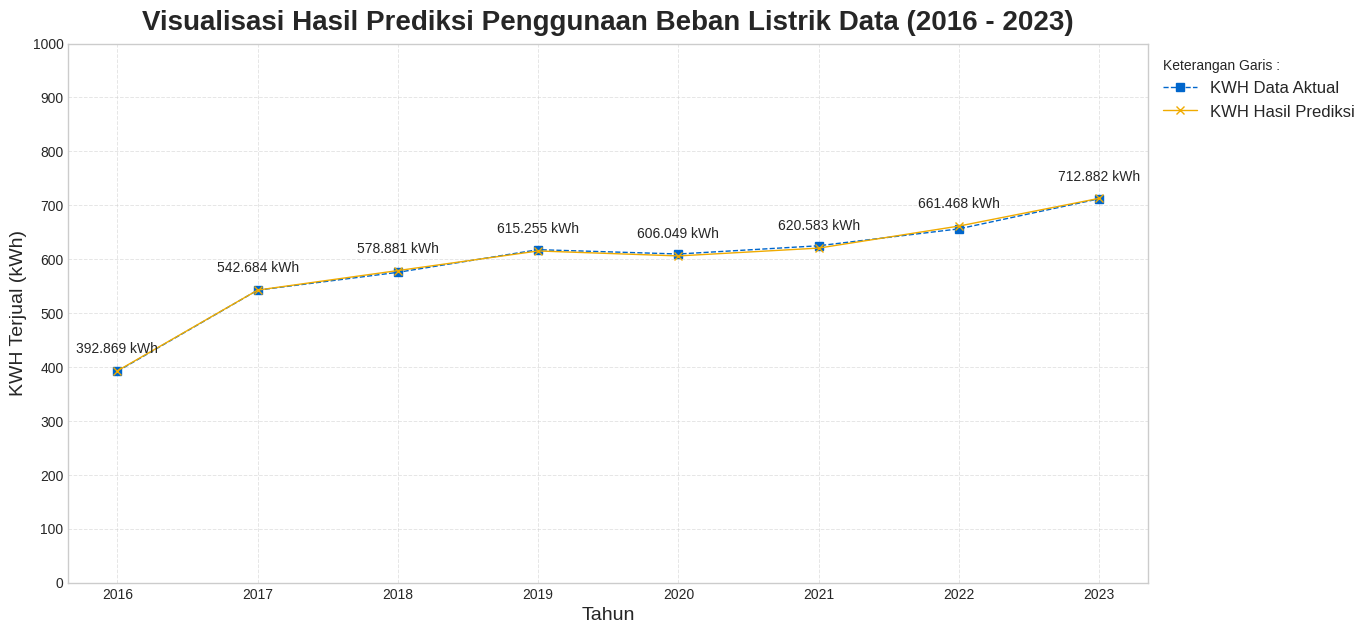

In [ ]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(16, 7))
colors = ['#06C', '#F0AB00']

ax.plot(data['TAHUN'], y, label='KWH Data Aktual', marker='s', linestyle='--', color=colors[0], linewidth=1)

ax.plot(data['TAHUN'], y_pred_aktual, marker='x', label='KWH Hasil Prediksi', color=colors[1], linewidth=1)
for i, (tahun, kwh_pred) in enumerate(zip(data['TAHUN'], y_pred_rounded)):
    ax.annotate(f'{kwh_pred:.3f} kWh', (tahun, kwh_pred), textcoords="offset points", xytext=(0,13), ha='center', fontsize=10)

ax.set_title('Visualisasi Hasil Prediksi Penggunaan Beban Listrik Data (2016 - 2023)', fontsize=20, fontweight='bold', pad=10)
ax.set_xlabel('Tahun', fontsize=14)
ax.set_ylabel('KWH Terjual (kWh)', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.5)
ax.set_ylim(0, 1000)

ax.set_xticks(data['TAHUN'])
ax.set_xticklabels(data['TAHUN'], rotation=0)
ax.yaxis.set_major_locator(MultipleLocator(100))

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, title="Keterangan Garis :", fontsize=12, alignment='left')

plt.subplots_adjust(right=0.8)

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.show()

# Evaluasi Model Menggunakan **MAE** dan **MAPE**

In [ ]:
mape = mean_absolute_percentage_error(y, y_pred_aktual)
mae = mean_absolute_error(y, y_pred_aktual)

print("Mean Absolute Error (MAE):", mae, "= {:.2f} kWh".format(mae))
print("Mean Absolute Percentage Error (MAPE):", mape,"= {:.2f}%".format(mape * 100))

Mean Absolute Error (MAE): 2.5718419672441257 = 2.57 kWh
Mean Absolute Percentage Error (MAPE): 0.004236681810022785 = 0.42%


# Visualisasi Hasil **Model Regresi Linear Berganda** Memprediksi **Data kWh Terjual Dalam 5 Tahun Kedepan (2024-2028)**

In [ ]:
tahun_prediksi = np.arange(2024, 2029)
jumlah_pelanggan_tren = np.polyfit(data['TAHUN'], data['JUMLAH PELANGGAN'], 1)
daya_tersambung_tren = np.polyfit(data['TAHUN'], data['DAYA TERSAMBUNG (kVA)'], 1)
pendapatan_penjualan_tren = np.polyfit(data['TAHUN'], data['PENDAPATAN PENJUALAN ENERGI (Rp)'], 1)

jumlah_pelanggan_prediksi = np.polyval(jumlah_pelanggan_tren, tahun_prediksi)
daya_tersambung_prediksi = np.polyval(daya_tersambung_tren, tahun_prediksi)
pendapatan_penjualan_prediksi = np.polyval(pendapatan_penjualan_tren, tahun_prediksi)

data_prediksi = pd.DataFrame({
    'JUMLAH PELANGGAN': jumlah_pelanggan_prediksi,
    'DAYA TERSAMBUNG (kVA)': daya_tersambung_prediksi,
    'PENDAPATAN PENJUALAN ENERGI (Rp)': pendapatan_penjualan_prediksi
})

kwh_prediksi_masa_depan = model.predict(data_prediksi)

hasil_prediksi_masa_depan = pd.DataFrame({
    'Tahun': tahun_prediksi,
    'KWH Prediksi': kwh_prediksi_masa_depan
})

hasil_prediksi_masa_depan

,Tahun,KWH Prediksi
0,2024,749.364484
1,2025,784.482425
2,2026,819.600366
3,2027,854.718307
4,2028,889.836247


<ipython-input-13-d15c3dceaa72>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


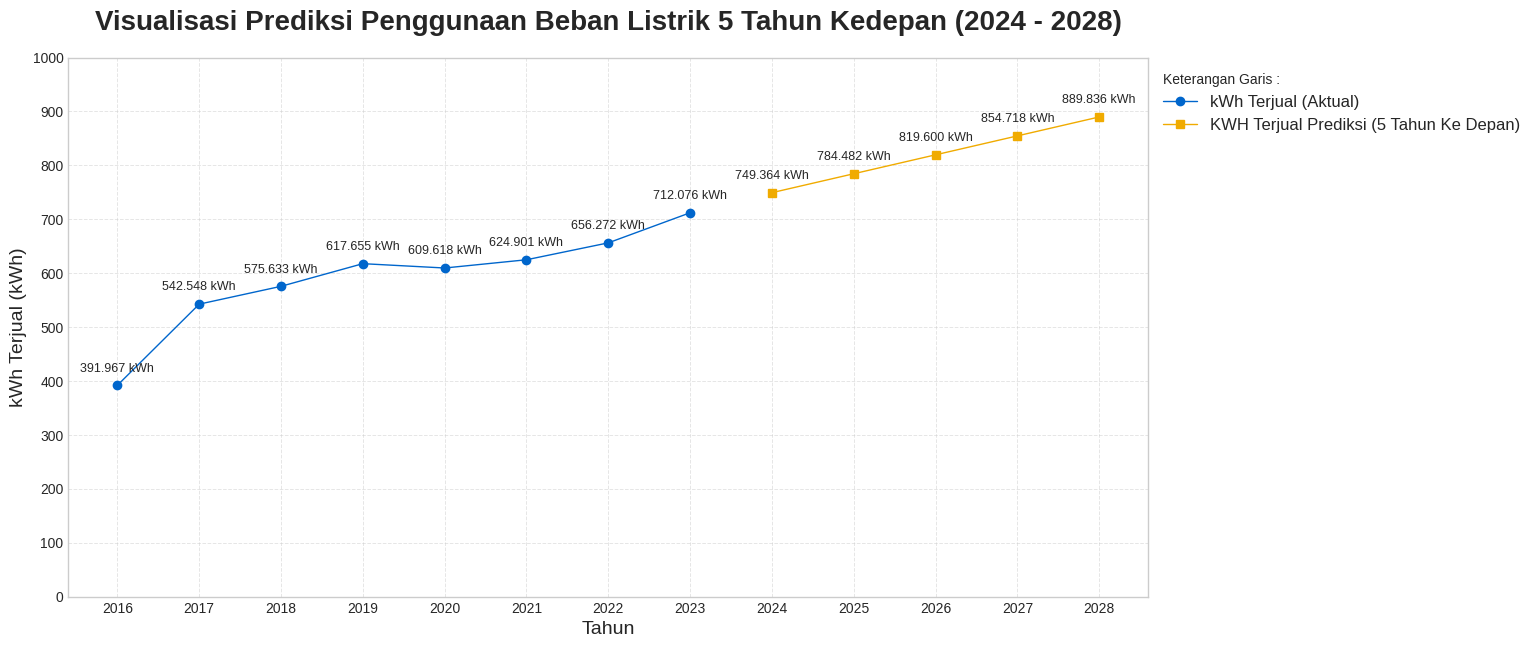

In [ ]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(16, 7))

colors = ['#06C', '#F0AB00']

ax.plot(data['TAHUN'], y, marker='o', label='kWh Terjual (Aktual)', color=colors[0], linewidth=1)
for i, (tahun, kwh) in enumerate(zip(data['TAHUN'], y)):
    ax.annotate(f'{kwh:.3f} kWh', (tahun, kwh), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

ax.plot(tahun_prediksi, kwh_prediksi_masa_depan, marker='s', label='KWH Terjual Prediksi (5 Tahun Ke Depan)', color=colors[1], linewidth=1)
for i, (tahun, kwh) in enumerate(zip(tahun_prediksi, kwh_prediksi_masa_depan)):
    ax.annotate(f'{kwh:.3f} kWh', (tahun, kwh), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

ax.set_title('Visualisasi Prediksi Penggunaan Beban Listrik 5 Tahun Kedepan (2024 - 2028)', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Tahun', fontsize=14)
ax.set_ylabel('kWh Terjual (kWh)', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.5)

tahun_gabungan = list(data['TAHUN']) + list(tahun_prediksi)
ax.set_xticks(tahun_gabungan)
ax.set_xticklabels(tahun_gabungan, rotation=0)
ax.set_ylim(0, 1000)

ax.yaxis.set_major_locator(MultipleLocator(100))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, title="Keterangan Garis :", fontsize=12, alignment='left')

plt.subplots_adjust(right=0.8)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.show()